# Assignment 4 : Predict Blood Donations

Our dataset is from a mobile blood donation vehicle in Taiwan. The Blood Transfusion Service Center drives to different universities and collects blood as part of a blood drive. We want to predict whether or not a donor will give blood the next time the vehicle comes to campus. <br>
Data is courtesy of Yeh, I-Cheng via the [UCI Machine Learning repository](https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center).

The dataset contains the following variables:
* Months since Last Donation: this is the number of monthis since this donor's most recent donation.
* Number of Donations: this is the total number of donations that the donor has made.
* Total Volume Donated: this is the total amound of blood that the donor has donated in cubuc centimeters.
* Months since First Donation: this is the number of months since the donor's first donation.

Your goal is to predict the last column, which is whether the donor donated blood in March 2007.

In [166]:
# imports
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
# show plots in the notebook
%matplotlib inline

1-1 load the "transfusion.data" dataset into a dataframe variable called df. Print the shape, head of df

In [167]:
df = pd.read_csv('transfusion.data')
df

Recency (months)  Frequency (times)  Monetary (c.c. blood)  \
0                   2                 50                  12500   
1                   0                 13                   3250   
2                   1                 16                   4000   
3                   2                 20                   5000   
4                   1                 24                   6000   
..                ...                ...                    ...   
743                23                  2                    500   
744                21                  2                    500   
745                23                  3                    750   
746                39                  1                    250   
747                72                  1                    250   

     Time (months)  whether he/she donated blood in March 2007  
0               98                                           1  
1               28                                           1  
2               35                                           1  
3               45                                           1  
4               77                                           0  
..             ...                                         ...  
743             38                                           0  
744             52                                           0  
745             62                                           0  
746             39                                           0  
747             72                                           0  

[748 rows x 5 columns]

1-2 Rename df columns to the following: `['Recency', 'Frequency', 'Volume', 'Time', 'Target']`, then print some info about df

In [168]:
df.rename(columns={'Recency (months)' : 'Recency', 'Frequency (times)' : 'Frequency', 'Monetary (c.c. blood)' : 'Volume', 'Time (months)' : 'Time', 'whether he/she donated blood in March 2007' : 'Target'}, inplace=True)
df.head()

Recency  Frequency  Volume  Time  Target
0        2         50   12500    98       1
1        0         13    3250    28       1
2        1         16    4000    35       1
3        2         20    5000    45       1
4        1         24    6000    77       0

## Data Exploration

2- Plot a **bar plot** of the column **Target** (% of each class). How much accuracy can you get if prediction is always equal to "*0*" ?

<AxesSubplot:>

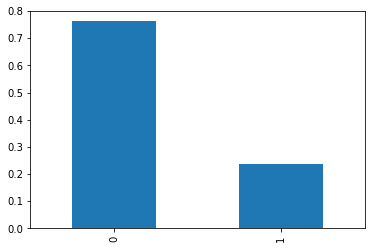

In [169]:
df['Target'].value_counts(normalize=True).plot.bar()

In [170]:
df.Target.value_counts(normalize=True).round(2) # 76%

0    0.76
1    0.24
Name: Target, dtype: float64

3-1 Print the [Correlation matrix](https://en.wikipedia.org/wiki/Correlation_and_dependence#Correlation_matrices) of df.

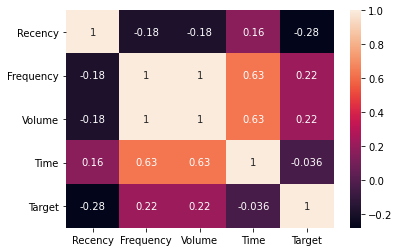

In [171]:
sn.heatmap(df.corr(), annot=True)
plt.show()

3-2 Which are the 2 most correlated variables, make a scatter plot of them. Could you guess how much blood is donated each time ?

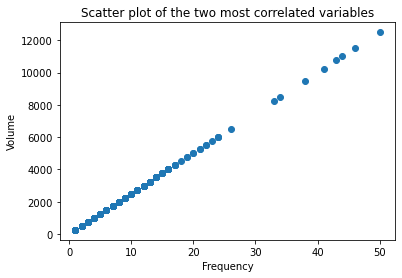

In [172]:
plt.scatter(df["Frequency"],df["Volume"])
plt.title('Scatter plot of the two most correlated variables')
plt.xlabel('Frequency')
plt.ylabel('Volume')
plt.show()

In [173]:
print("Amount of blood donated each time :" ,(df['Volume']/df['Frequency']).mean())

Amount of blood donated each time : 250.0


3-3 Remove one of the two most correlated variables above. The choice should have no consequence for the rest, but to have the same results among all students, remove the column with the shortest name (small number of letters)

In [174]:
df.drop('Volume',axis='columns', inplace=True)
df.head()

Recency  Frequency  Time  Target
0        2         50    98       1
1        0         13    28       1
2        1         16    35       1
3        2         20    45       1
4        1         24    77       0

## Model Training & Evaluation

4- Load the target variable into a dataframe and call it y. Then, load the features into a second dataframe and call it X. Fit a logistic model using cross validation. Use 5 folds and print the average accuracy

In [175]:
y = df['Target']
X = df.drop('Target', axis=1)
print(X.columns)

Index(['Recency', 'Frequency', 'Time'], dtype='object')


In [176]:
from sklearn.linear_model import LogisticRegression
clf_log = LogisticRegression()

from sklearn.model_selection import cross_val_score
scores_log = cross_val_score(clf_log, X, y, scoring='accuracy', cv=5) 
print('cross validation r2 =', scores_log.mean()) 

cross validation r2 = 0.7727874720357942


5- Fit a RandomForestClassifier [RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) using cross validation. Use 5 folds and print the average accuracy. <br>
Set random_state=1 and play around the other parameters manually to improve the score

In [177]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(random_state=1,n_estimators=100)
scores_rf = cross_val_score(clf_rf, X, y, scoring='accuracy', cv=5) 
print('cross validation accuracy =', scores_rf.mean())

cross validation accuracy = 0.6819865771812081


6- So far, you were told to leave all the parameters to default values, let's now optimize some of them using GridSearchCV. <br>
Search the following parameters in the given values (**This may take a while**):
* min_samples_leaf: [1, 4, 7]
* min_samples_split: [2, 4, 6, 8, 10]
* n_estimators: [20, 30, 40]
* max_depth: [2,3]

In [178]:
from sklearn.model_selection import GridSearchCV
params = {'min_samples_leaf': [1,4,7],'min_samples_split': [2, 4, 6, 8, 10],
          'n_estimators':[20, 30, 40], 'max_depth':[2,3]}
clf_rf2 = RandomForestClassifier(random_state=1)
clf_gs = GridSearchCV(clf_rf2, params, scoring = 'accuracy',cv=5)
clf_gs.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [2, 3], 'min_samples_leaf': [1, 4, 7],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': [20, 30, 40]},
             scoring='accuracy')

7- Print the best score, and the best parameters

In [179]:
clf_gs.best_score_

0.7740223713646532

In [180]:
clf_gs.best_params_

{'max_depth': 3,
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'n_estimators': 30}

8- Build a dataframe containing the importance of each feature. Sort it from the most important to the least one.

In [181]:
predictors = ['Recency','Frequency','Time']  
clf_rf3 = RandomForestClassifier(random_state=1, n_estimators=30, min_samples_leaf=7,min_samples_split=2, max_depth=3) 
clf_rf3.fit(X,y)
feat_imp = pd.DataFrame(clf_rf3.feature_importances_, predictors, columns=['Importance'])
feat_imp.sort_values('Importance', ascending=False)

Importance
Recency      0.443683
Frequency    0.372613
Time         0.183705

9- **Feature engineering**: Try to improve the *RandomForestClassifier* by adding engineered features and using 5 fold grid search for parameter tuning. Print the best score and the best parameters.   
**Hint**: You can achieve 78,6 % accuracy or higher.

In [182]:
X["new_variable"] = (X["Frequency"]/X["Time"])

clf_rf2 = RandomForestClassifier(random_state=1, n_estimators=30, min_samples_leaf=7,min_samples_split=2, max_depth=3) 
clf_gs = GridSearchCV(clf_rf2, params, scoring = 'accuracy',cv=5)
clf_gs.fit(X, y)

print("best score : ", clf_gs.best_score_.round(3))
print("best parameters: ", clf_gs.best_params_)

best score :  0.786
best parameters:  {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}


10- Always in the same setting (5 fold grid search), try different ensemble models from [sklearn](http://scikit-learn.org/stable/modules/ensemble.html#ensemble) in order to get the highest accuracy. Print the best score

In [183]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingRegressor

params = {'min_samples_leaf': [3,5,6],'min_samples_split': [8, 10, 11, 12, 15],
          'n_estimators':[35, 40, 45], 'max_depth':[5,6,10]}

clf_imp = ExtraTreesClassifier(random_state=1)
clf_gs = GridSearchCV(clf_imp,params, scoring = 'accuracy',cv=5)
clf_gs.fit(X, y)

print("best score : ", clf_gs.best_score_.round(3))
print("best parameters: ", clf_gs.best_params_)

best score :  0.773
best parameters:  {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 11, 'n_estimators': 40}
